# Praca domowa 7

W tej pracy domowej zajmę się kompresją obrazka za pomocą PCA.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.image as mpimg

Będę zajmował się kompresją obrazka pokazanego poniżej. Jego rozmiar to prawie milion komórek. Będę próbował, przy jak najmniejszej stracie jakości, zmniejszyć ten rozmiar.

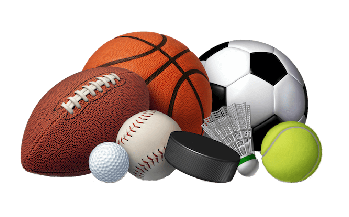

Rozmiar orginalnego obrazka: 995840


In [64]:
sport = mpimg.imread('sport.png')
plt.imshow(sport)
plt.axis('off')
plt.show()
original_size = sport.shape[0]*sport.shape[1]*sport.shape[2]
print("Rozmiar orginalnego obrazka: " + str(original_size))

In [65]:
def pca_compression(n_components):
    sport_2D = np.reshape(sport, (sport.shape[0], sport.shape[1]*sport.shape[2]))
    pca = PCA(n_components = n_components)
    sport_plt = pca.fit_transform(sport_2D)
    
    size = (pca.components_.shape[0]*pca.components_.shape[1]+sport_plt.shape[0]*sport_plt.shape[1])
    
    sport_plt = pca.inverse_transform(sport_plt)
    sport_plt = np.reshape(sport_plt, (sport.shape[0], sport.shape[1], sport.shape[2]))

    variance = np.sum(pca.explained_variance_ratio_)
    
    return(sport_plt, size, variance)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


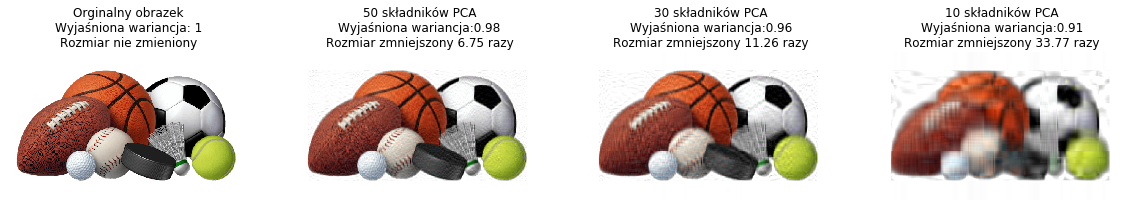

In [66]:
fig, axs = plt.subplots(1, 4, figsize = (20, 10))
axs[0].imshow(sport)
axs[0].set_title('Orginalny obrazek\nWyjaśniona wariancja: 1\nRozmiar nie zmieniony')
axs[0].axis('off')
img1, size1, variance1 = pca_compression(50)
axs[1].imshow(img1)
axs[1].set_title('50 składników PCA\nWyjaśniona wariancja:' + str(round(variance1, 2))
                 + '\nRozmiar zmniejszony ' + str(round(original_size/size1, 2)) + ' razy')
axs[1].axis('off')
img2, size2, variance2 = pca_compression(30)
axs[2].imshow(img2)
axs[2].set_title('30 składników PCA\nWyjaśniona wariancja:' + str(round(variance2, 2))
                 + '\nRozmiar zmniejszony ' + str(round(original_size/size2, 2)) + ' razy')
axs[2].axis('off')
img3, size3, variance3 = pca_compression(10)
axs[3].imshow(img3)
axs[3].set_title('10 składników PCA\nWyjaśniona wariancja:' + str(round(variance3, 2))
                 + '\nRozmiar zmniejszony ' + str(round(original_size/size3, 2)) + ' razy')
axs[3].axis('off')
plt.show()

PCA poradziło sobie bardzo dobrze z postawionym jej zadaniem. Przy odpowiednim dobraniu liczby składników PCA, możemy zmniejszyć obrazek 7-krotnie tracąc bardzo nie wiele na jakości obrazka czy wyjaśnionej wariancji. Możemy również zmniejszyć rozmiar nawet 34-krotnie tracąc tylko 0.09 wyjaśnionej wariancji. Dobór najlepszej liczby składników zależy od tego, do czego miałyby służyć obrazki później.

Potwierdzam samodzielność powyższej pracy oraz niekorzystanie przeze mnie z niedozwolonych źródeł.
<br>
298849
<br>
Jacek Wiśniewski